# Continued Fractions

## Examples

In [17]:
continued_fraction(pi)

[3; 7, 15, 1, 292, 1, 1, 1, 2, 1, 3, 1, 14, 2, 1, 1, 2, 2, 2, 2, ...]

In [18]:
continued_fraction(10/7)

[1; 2, 3]

In [19]:
continued_fraction(sqrt(2))

[1; 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...]

In [20]:
continued_fraction(e)

[2; 1, 2, 1, 1, 4, 1, 1, 6, 1, 1, 8, 1, 1, 10, 1, 1, 12, 1, 1, ...]

# Nerdy greeting code

In [4]:
# code for my presentation on 251213.  This runs in Sagemath, a variant of Python.  
# Contact me if you want help running or modifying the code.


####################
# the main idea: convert an image into 0s and 1s stored in a rectangular array (matrix)
#
####################

#matrix graph
#plot y=f(x) on matrix pixels
# idea is to take real (x,y) and turn it into integer (x,y)

xScale = 10
yScale = 10
xC = 0
yC = 0

n=50

points =[[float(cos(2*pi*k/n)),float(sin(2*pi*k/n))] for k in range(50)]

#scale points and round
def scale(pts,xc, yc, xs, ys):
    new = []
    for pt in pts:
        new.append([int(round(xs*pt[0]+xc)),int(round(ys*pt[1]+yc))])
    return new
    
   
#scale a circle
circlePts=scale(points,0,0,10,10)

#make a 0/1 matrix from a set of integer points
#need to define the value for the lower left ('sw'), and need to know rows and cols

def ptsToMatrix(pts, nRows, nCols, swRow, swCol):
    # make a matrix of 1s
    mat = [[1 for r in range(nCols)] for c in range(nRows)]
    # put zeros in the selected spots
    for pt in pts:
        x=pt[0]-swCol
        y=pt[1]-swRow
        mat[x][y]=0
    return mat
###############################################
#Make a circle of radius R

def circlePts(r,nPts):
    points =[[float(cos(2*pi*k/nPts)),float(sin(2*pi*k/nPts))] for k in range(nPts)]
    return scale(points,0,0,r,r)
    
def drawCircle(r,nPts):
    mat=ptsToMatrix(circlePts(r,nPts),2*r+1,2*r+1,-r,-r)
    return matrix_plot(mat)

######################
# the nerdy part: take the matrix and convert the 0s and 1s into a sequence of 0s and 1s 
# which naturally can be converted into a "decimal" number in binary. Make sure that the array has dimensions
# prime x prime, so the sequence can only be "converted" into an array of 0s and 1s in one way.
######################

def matToSeq(mat):
    #unspool a 2-dim r x c array into a single sequence of length rc. Ideally, r and c are primes.
    seq = []
    for r in range(len(mat)):
        for c in range(len(mat[r])):
            seq.append(mat[r][c])
    return seq
    
def seqToNum(seq, base):
    val=0
    d=1
    for n in seq:
        d=d*base
        val += n/d
    return val

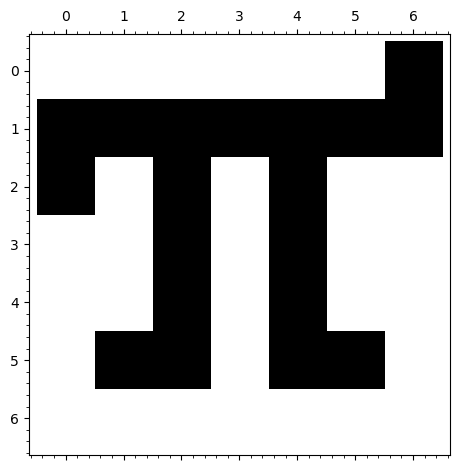

In [1]:
#  example: this 7x7 array was coded by hand. It looks like "pi" as you can see when we plot it.
pimat=[[0,0,0,0,0,0,1],
       [1,1,1,1,1,1,1],
       [1,0,1,0,1,0,0],
       [0,0,1,0,1,0,0],
       [0,0,1,0,1,0,0],
       [0,1,1,0,1,1,0],
       [0,0,0,0,0,0,0]
      ]
matrix_plot(pimat)

In [5]:
# to nerdify it, we convert the array into a sequence and the sequence into a binary fraction.  
# The sequence has length 7x7=49, so the fraction will be of the form N/2^49, but when it is reduced, the denominator is a bit smaller. 
# (This is because of the white space at the bottom of the picture. Why?)

seq = matToSeq(pimat)
val = seqToNum(seq,2)  # the 2 is for base-2
print(val)

34313766171/2199023255552


In [14]:
v=val.n()
print(v.str(base=2))

1.1111111101010000101000010100011011000000000000000000e-7


In [21]:
#circle example
# create the matrix for a circle of radius 21 using 200 points, hence it will be a 43x43 array
r=21
nPts=200
mat=ptsToMatrix(circlePts(r,nPts),2*r+1,2*r+1,-r,-r)
seq=matToSeq(mat); len(seq) #notice that the sequence from the matrix has 43x43 terms

1849

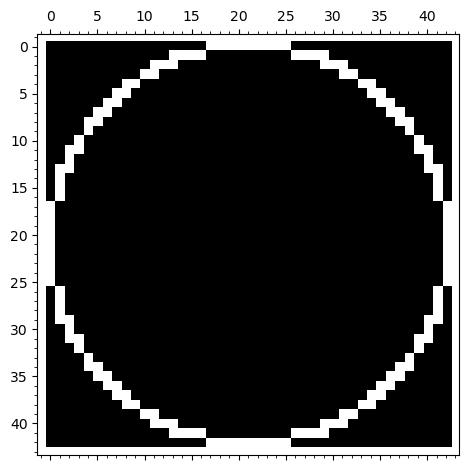

In [22]:
#check to see that the matrix actually looks like a circle
matrix_plot(mat)

In [23]:
# now nerdify by turning the sequence into a binary fraction.
# notice that val is a fraction whose denominator is 2^1849=2^(43^3)!

val=seqToNum(seq,2);val

40221538234331631995517113216828735986825902391131635168905684966661863650428012508878551717004544308731808965113727771355191712127312861826714721341130227439286230945696974390992629701789511532294670727327950687558159337923420826842915316808048942642008093613919554660682891529714767717520877814644501906506732760178708696624542866722359639207964121166522845407899989964572837551790618962964740356119141647349869533525707515223944905302106220669899977616563155611169586851340516431224963099100988516397198168695977958020553328105153241102429364961421688831/4022184450329993432572821082205226112949222876729137555980550128497322452836796272001001151076672031927355048508838870749820413749826552827404969388366973930787516769685955182697882969909740247855114831153852199781491132289433637415284711452444560232605647349985815047728492067079822308821555724703153536877448131044872113496450426928011266752054927503704698905562922678689242194779340562408283854639875559688337407084805192305501683828702097